In [37]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [38]:
OUT_DIR = os.path.join(os.getcwd(),"out")

SRC_DIR = os.path.join(os.getcwd(),"resources")

### figure formatting

In [39]:
font={
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 11,
}

plt.rcParams.update(font)

def create_fig():
    figure,ax = plt.subplots(figsize=(4,2.5))
    plt.grid()
    return figure, ax

def export_fig(fig, filename,out_dir=OUT_DIR, fformat=".pdf"):
    fig.savefig(os.path.join(out_dir,filename+fformat), bbox_inches='tight')

## Infinite plane

In [40]:
# get file from
dat = pd.read_csv(os.path.join(SRC_DIR,"inf_plane_data.csv"))

colocated

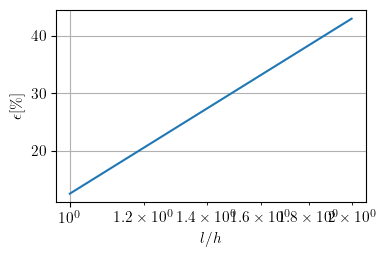

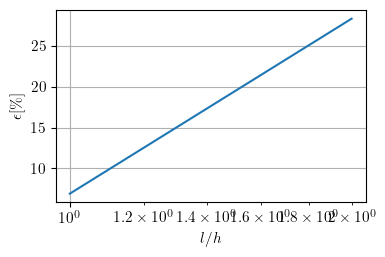

In [41]:
num_patches = (50/dat["patch_size"][:])**2
patch_ratio = dat["patch_size"][:]/3
psize = np.array(dat["patch_size"][:])

for code in ["col","dif"]:
# relative error as a function of patch size
    f,a = create_fig()
    plt.semilogx(patch_ratio[:],dat[code+"_rel"][:])
    plt.ylabel('$$\epsilon [\%]$$')
    plt.xlabel("$$ l/h $$")
    plt.show()
    export_fig(f,code+"_rel")



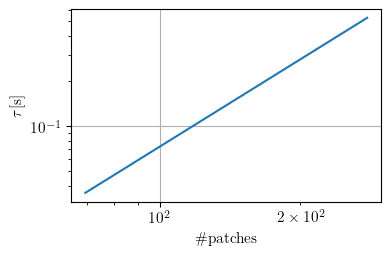

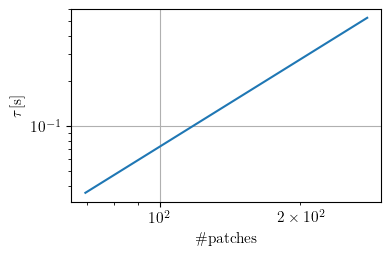

In [42]:
for code in ["col","dif"]:
    # runtime as a function of patch size
    f,a = create_fig()
    plt.loglog(num_patches,dat[code+"_rt"])
    plt.ylabel('$$\\tau [\mathrm{s}]$$')
    plt.xlabel("$$ \mathrm{\# patches}$$")
    plt.show()
    export_fig(f,code+"_rt")

as a function of angle

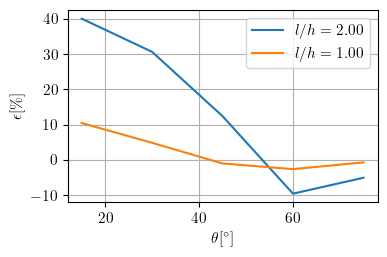

In [43]:

angles = np.arange(15,90,15)
f,a = create_fig()
legend = []
for i,ratio in enumerate(patch_ratio[:]):
    data_list = []
    for ang in angles:
        data_list.append(dat["var_rel_"+f'{ang}'][i])

    plt.plot(angles,data_list)

    legend.append(f'$$l/h={ratio:.2f}$$')

plt.ylabel('$$\epsilon [\%]$$')
plt.xlabel("$$\\theta [^{\circ}]$$")
plt.legend(legend)
plt.show()
export_fig(f,"var_rel")